In [5]:
import shap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [15]:
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

print(feature_names)
# print(X[:5])
print(X.shape, y.shape)
# print(type(X), type(y), type(feature_names))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


model = xgb.XGBRegressor().fit(X_train, y_train)
y_predict = model.predict(X_test)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4) (150,)
(120, 4) (30, 4)


[[ 1.77124850e-02 -1.69891752e-02 -9.59578216e-01 -3.28320861e-02]
 [-1.38033675e-02 -2.36149132e-02 -9.31223869e-01 -2.30447818e-02]
 [-5.15807606e-03 -1.36640351e-02  8.31943676e-02 -5.64044528e-02]
 [ 1.77124850e-02 -1.69891752e-02 -9.59578216e-01 -3.28320861e-02]
 [ 1.77002903e-02 -1.69753768e-02 -9.59579766e-01 -3.28320861e-02]
 [ 9.69192013e-03  1.30895162e-02  8.08621645e-01  1.77318051e-01]
 [ 5.37627668e-04 -2.07061917e-02  7.63293430e-02 -4.74998988e-02]
 [-1.41647514e-02 -2.35991031e-02 -9.30881560e-01 -2.30415501e-02]
 [-1.41647514e-02 -2.35991031e-02 -9.30881560e-01 -2.30415501e-02]
 [-1.41647514e-02 -2.35991031e-02 -9.30881560e-01 -2.30415501e-02]
 [-8.60623457e-03  1.16930548e-02  7.97630966e-01  2.07193062e-01]
 [-1.22265704e-02 -3.39524113e-02  1.62945569e-01 -1.09185360e-01]
 [-4.59677912e-03 -1.42253656e-02  7.80127421e-02 -4.97728325e-02]
 [-1.41647514e-02 -2.35991031e-02 -9.30881560e-01 -2.30415501e-02]
 [-1.41647514e-02 -2.35991031e-02 -9.30881560e-01 -2.30415501e

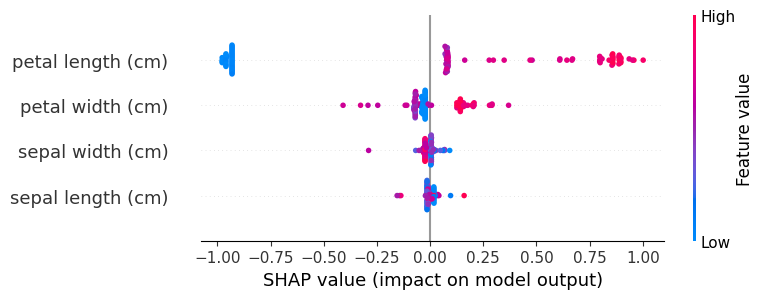

In [18]:
# Create a SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
print(shap_values)
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

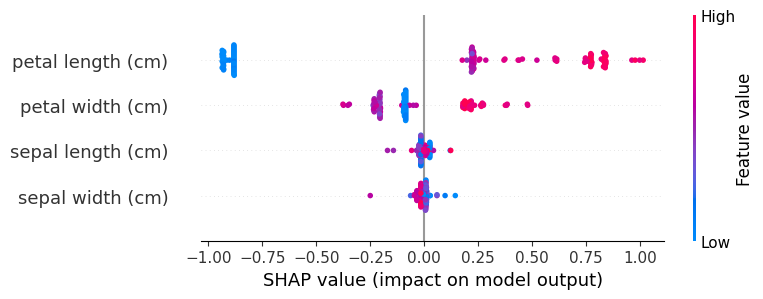

In [4]:
# Visualize the SHAP summary plot with feature names
shap.summary_plot(shap_values, X, feature_names=feature_names)